<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Steps:" data-toc-modified-id="Steps:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Steps:</a></span></li><li><span><a href="#General" data-toc-modified-id="General-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>General</a></span></li></ul></li><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Download-and-take-a-look-at-the-data" data-toc-modified-id="Download-and-take-a-look-at-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download and take a look at the data</a></span></li><li><span><a href="#Data-directories" data-toc-modified-id="Data-directories-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data directories</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Define-the-model-layers" data-toc-modified-id="Define-the-model-layers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define the model layers</a></span></li><li><span><a href="#Compile-the-model" data-toc-modified-id="Compile-the-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compile the model</a></span></li><li><span><a href="#Model-summary-and-plot" data-toc-modified-id="Model-summary-and-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model summary and <em>plot</em></a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Plot--the-learning-curves" data-toc-modified-id="Plot--the-learning-curves-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot  the learning curves</a></span></li><li><span><a href="#Test-model-on-'test'-dataset" data-toc-modified-id="Test-model-on-'test'-dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Test model on <em>'test'</em> dataset</a></span></li></ul></li><li><span><a href="#Model-Improvement" data-toc-modified-id="Model-Improvement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Improvement</a></span><ul class="toc-item"><li><span><a href="#Dropout" data-toc-modified-id="Dropout-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropout</a></span></li><li><span><a href="#Augmentation" data-toc-modified-id="Augmentation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Augmentation</a></span></li></ul></li><li><span><a href="#Transfer-learning" data-toc-modified-id="Transfer-learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transfer learning</a></span></li><li><span><a href="#Extras" data-toc-modified-id="Extras-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extras</a></span><ul class="toc-item"><li><span><a href="#Predict-on-single-images" data-toc-modified-id="Predict-on-single-images-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Predict on single images</a></span></li><li><span><a href="#Tracking-and-logging" data-toc-modified-id="Tracking-and-logging-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Tracking and logging</a></span></li><li><span><a href="#Looking-at-feature-maps-(what-does-a-convnet-learn)" data-toc-modified-id="Looking-at-feature-maps-(what-does-a-convnet-learn)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Looking at feature maps (what does a convnet learn)</a></span></li></ul></li></ul></div>

# Classification with Convolutional Neural Networks


The aim of this notebook is to showcase in practice - i.e. in code - how to build a simple 2D CNN for the purpose of classifying image data.

The dataset used is intentionally a relatively small dataset, for the sake of time economy, but also in order to reduce the computational resources required.

Remember: https://keras.io is a useful source of information regarding Keras and Tensorflow.


###  Steps:

1) DATA. As a first step we will load the original data and divide the available images into three datasets (training, validation, test). 

2) MODEL. Build the network architecture. This is the part where we put together the code which: describes the neural network, processes the images, and feeds the images into the network for training. The training of the model also happens in this step.

3) LEARNING CURVES. Once the training is finished, plot the performance of the trained model (using 'accuracy' as our metric) in order to evaluate how well it did (or not).

4) DROPOUT. A first effort to improve the performance of the model (if we observed overfitting earlier).

5) AUGMENTATION. Another way to improve model accuracy or avoid overfitting

6) TRANSFER LEARNING. Load and use an existing pretrained model for classifying the same dataset.



### General

Let's start by importing **various useful** libraries in one go. 
We also check the versions of keras and tensorflow he have in our disposal (because we can).
If more libraries become needed later on, come back to the cell below and add them here.

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os, shutil
from shutil import copyfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

print(keras.__version__)
print(tensorflow.__version__)

In [ ]:
# if curious about the hardware resources google has reserved for you in this GPU session, execute this:
!nvidia-smi

## DATA


We will use an existing dataset, dowloaded from kaggle (https://www.kaggle.com/prasunroy/natural-images)

This is a set of images of 8 different objects. 
The original dataset is modified a bit in order to have equal number of images in each class.


### Download and take a look at the data

In [ ]:
# download a zip file containing the image data we will use 
!gdown --id 13uS1xSm1p6mjiTU72paSAB70p3XKn3NA


In [ ]:
# unzip the file
!unzip '/content/natural_images.zip'

In [ ]:
# let's randomly plot some of the images to see what they look like 
# (every time you execute this cell you will get a random image from your dataset)
data_path='/content/natural_images'
obj=random.choice(os.listdir(data_path))
file=random.choice(os.listdir(os.path.join(data_path,obj)))

print('This is an image of a(n):',obj)
img=mpimg.imread(os.path.join(data_path,obj,file))
plt.imshow(img)
plt.show()

### Data directories

**Create a hierarchy of directories**, with seperate directories for *training*,  *validation*, and *test* datasets. Each one of these will contain a subdirectory for each *class*.

_Important_: __obviously, building the datasets only needs to be done once.__ 

In [ ]:
# In the line below define as 'base' the entry dir of our session
base='/content'

# define the directory to store the datasets we will create soon
classification_data_path=os.path.join(base + '/natural_images_classification') 

In [ ]:

# create the directory tree described earlier
if not os.path.exists(classification_data_path):
  os.mkdir(classification_data_path)

# define datasets (i.e. subdirs within the 'base' dir) and define classes (i.e. sub-subdirs for each of the dataset directories)
datasets=['train','validation','test']
classes=['airplane','car','cat','dog','flower','fruit','motorbike','person']

# create that hierarchy of dirs and subdirs
for dtype in datasets:
  path_set=os.path.join(classification_data_path,dtype)
  if not os.path.exists(path_set):
    os.mkdir(path_set)
  for c in classes:
    path_class=os.path.join(path_set,c)
    if not os.path.exists(path_class):
      os.mkdir(path_class)      

In [ ]:
# Function  - named 'pop_dirs' - for splitting the data into train, validation, and test data (after shuffling them) 
# and populating the directory tree created above.

def pop_dirs(SOURCE, TRAINING, VALIDATION, TEST, SPLIT_SIZE):
    # create list of all filenames in the SOURCE directory
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, will skip.") # if a file is empty, ignore it

            
    # First decide how many files should go in each dataset (based on the SPLIT_SIZE parameter).
    # Then randomly assign which  filenames should go in each one of the datasets (shuffle namelinst before splitting them)        
    training_length = int(len(files) * SPLIT_SIZE)               
    validation_length = int((len(files) - training_length)/2.0)
    test_length = validation_length
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:training_length+validation_length]
    test_set = shuffled_set[training_length+validation_length:training_length+validation_length+test_length]


    # Based on the name lists created above, copy files into relevant dirs.
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)

In [ ]:
# The actual copying of files from the 'data' folder into the folder hierarchy created earlier. 

j=0
# fraction of data (from 0.0 to 1.0) to be used as training data. The rest will be split equally among validation and test datasets
split_size = .7 


for c in classes:

  src_path=os.path.join(base,'natural_images',c)+'/'

  train_path=os.path.join(classification_data_path,'train',c)+'/' 
  validation_path=os.path.join(classification_data_path,'validation',c)+'/'
  test_path=os.path.join(classification_data_path,'test',c)+'/'

  print('Copyting data FROM:')
  print(src_path)
  print('TO:')
  print(train_path)
  print(validation_path)
  print(test_path)
  print('\n')  
    
  pop_dirs(src_path, train_path, validation_path, test_path, split_size)
  j+=1


Check the number of images for each dataset and each class.

There should 700 images for each class.
For a 70%-15%-15% split, you should have 490 training, 105 validation, and 105 test images for each class.

In [ ]:
datasets=['train','validation','test']
classes=['airplane','car','cat','dog','flower','fruit','motorbike','person']

for dset in datasets:
  for c in classes:
    path=os.path.join(base,'natural_images_classification',dset,c)
    print('number of',  dset,  'images in', c,':', len(os.listdir(path)))

**EXCELLENT!** You now have generated three dataset directories, with the data needed for training and evaluating your model. **Let's now build the model**

## Model

This section containes the code for the CNN model architecture, loading the data into the model, compiling the model, and training the model.

In [ ]:
# Run ONLY when clearing of the session is needed

tensorflow.keras.backend.clear_session()

In [ ]:
# Place needed and updatable parameters in a dictionary for easy access and change
# Changing model hyperparameters such as learning rate, number of epochs, batch size, input size etc. can help improve the performance of a model
# You can experiment with these values by changing their entries below.
PARAMS = {'lr': 1e-3, # Learning Rate
          'batch_size': 64,
          'n_epochs': 30,  # 25 to 40 epochs is a good range for our example and runs in reasonable time
          'loss': 'categorical_crossentropy',
          'metrics': 'acc', # accuracy
          'image_input_shape' : (100,100,3),
          'save_model' : 'classification_1.h5' 
          }

In [ ]:
# Use the ImageDataGenerator class from Keras, and its flow_from_directory method to generate shuffled data batches
# Notice that the images are rescaled (division with 255) so that each pixel value ranges between 0 and 1.

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train = train_datagen.flow_from_directory(
        classification_data_path+'/train',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical') 

validation = validation_datagen.flow_from_directory(
        classification_data_path+'/validation',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical')


test = test_datagen.flow_from_directory(
        classification_data_path+'/test',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical')

In [ ]:
# Check the sizes of the image and label batches (useful for debugging size errors)
for images_batch, labels_batch in train:
    print('Image batches have shape:', images_batch.shape)
    print('Label batches have shape:', labels_batch.shape)
    break

### Define the model layers


Use Conv2D layers, each of wich will be followed by MaxPooling2D layer. 

- How many Conv2D layers to use? (in this case **3 is a good guess** to start with)
- Number of filters for each? (powers of two typically used, with number of filters typically increassing in deeper layers, i.e. 32,64,128)
- Size of these filters? 3x3, or 5x5, or 7x7 are typical values (start with **3x3**)
- A Flatten layer should be added after the last Conv2D + MaxPooling layer 
- Last layer should be a Dense layer with a 'softmax' activation, as we are building a 'classification' model. The number of nodes for this layer should of course be equal to the number of classes in our data.
- It is likely that more Dense layers can be added between the Flatten and the last Dense layer (the classifier).


<font color='blue'> **Task 1:**
+ Build the CNN, by adding the necessary sequence of layers: use what was discussed in the lecture and in the text just above as quide. 
You should build something like this: </font>

<font color='blue'>
Conv2D + MaxPooling --> Conv2D + MaxPooling --> Conv2D + MaxPooling --> Flatten --> Dense --> Dense(final classifier with softmax activation)
</font>

**The first convolutional layer (input layer) and following maxpooling is already in place as a guide. NOTE: only input layer needs the 'input_shape' argument**

In [ ]:
# The model layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=PARAMS['image_input_shape']))
model.add(layers.MaxPooling2D((2, 2)))
### add code here:



### Compile the model

In [ ]:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.Adam(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])

### Model summary and *plot*

Draw a summary of each layer of the model.

In [ ]:
model.summary()

Plot a graph of the model architecture

In [ ]:
# create a graph of the model layers and save a png image of it
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,rankdir='TB',show_layer_names=True)

### Train the model

In [ ]:
# Fit (i.e train) the model 

spe=len(train)   # Steps Per Epoch: train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size


history = model.fit(
            train,
            steps_per_epoch=spe,  
            epochs=epoch_num,
            validation_data=validation,
            validation_steps=val_steps) 


# To save the output of the model, uncomment the line below.
#model.save(PARAMS['save_model'])

### Plot  the learning curves 

In [ ]:
# Check the progress of the training, by plotting the Learning Curves:
# a) Accuracy of the model on the train and validation datasets as a function of epochs (time)
# b) Value of loss function on train and validation datasets as a function of epochs

# if the model was saved from an earlier run, uncomment the line below to load it
#model = load_model('name_of_model_to_load.h5')

epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

### Test model on *'test'* dataset

As a final step on checking the performance of the model, we run the trained model on the third dataset, the 'test' dataset. (These are data that our model has not seen yet).


In [ ]:
test_score = model.evaluate(test)
print(model.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

## Model Improvement


### Dropout


One way to overcome overfitting of the model is to add one or more Dropout layers in the model. (https://keras.io/api/layers/regularization_layers/dropout/)

A 'Dropout' layer will randomly drop-out (i.e. remove) a user-defined number of nodes (i.e. connections) between two layers.

Adding a dropout layer looks like this:
    *model.add(layers.Dropout(0.5))*
The argument of Dropout is a number from 0.0 to 1.0 which corresponds to the fraction of nodes to **remove** . 

A typical value  is around 0.5-0.6 (i.e. 50-60% or the nodes removed).


<font color='blue'>**Task 2**
Add a Dropout Layer in the model you created earlier and train the model again (add the Dropout layer after a Dense layer).
How do the learning curves compare to those of the previous model?

**NOTE:** 
 + remember to clear the session with the command available at the beginning of Section 2
 + must run again the cell with the model architecture, and compile the model again before fitting the new architecture. 
</font>


In [ ]:
# clear the session

### add code here:


In [ ]:
# model layers
# use the previous model PLUS a (or two) dropout layer


### add code here:


In [ ]:
# compile the model

### add code here:



In [ ]:
# fit the model
spe=len(train)   # Steps Per Epoch: train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size

### add code here:



In [ ]:
# plot the learning curves

### add code here:



In [ ]:
# evaluate model on *test* dataset

### add code here:



### Augmentation

One possible remedy for overfitting, when it is caused by lack of enough data, is to use data augmentation.
In data augmentation, already existing data - images in our case - are 'tranformed' into new data through some basic transformations like mirroring or flipping, rotation, zoom, rescaling, etc.  of the image.


In Keras, the ImageDataGenerator class, offers an easy way to include these augmentation techniques.
Check the ImageDataGenerator entry here:https://keras.io/api/preprocessing/image/  to see how it is done.

<font color='blue'>**Task 3**
-Based on the Keras link above, choose some augmentation transformations (zoom, flip, rotation) which make sense for the dataset you are using, and implement these transformations within the ImageDataGenerator.         
**NOTE**: augmentation is applied only on the training dataset  (although this is a point of discussion and disagreement)  
-Train again the model and plot its performance on the new, augmented dataset.  
-Do not forget to also evaluate the trained model on the 'test' dataset</font>
    
    

In [ ]:
# clear the session

tensorflow.keras.backend.clear_session()

In [ ]:

# add arguments that define augmentation techniques in the ImageDataGenerator line below

### complete the code below:
train_datagen = ImageDataGenerator(rescale=1.0/255. ### complete with the right arguments) 

# this can be left as is
train = train_datagen.flow_from_directory(
        classification_data_path+'/train',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical') 



In [ ]:
# use the same model layers which you used the first time (i.e. no dropout layer)

### add code here:


In [ ]:
# compile model 
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.Adam(PARAMS['lr']),
              metrics=[PARAMS['metrics']])

In [ ]:
# Fit the model 
spe=len(train)   # train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size


history = model.fit(
            train,
            steps_per_epoch=spe,  
            epochs=epoch_num,
            validation_data=validation,
            validation_steps=val_steps) 

In [ ]:
# plot the learning curves


epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [ ]:
# evaluate model on *test* dataset

test_score = model.evaluate(test)
print(model.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

## Transfer learning

We will use the VGG16 network (https://arxiv.org/abs/1409.1556) trained on the ImageNet dataset (http://image-net.org/about-overview).
As it is already part of the Keras library, it is easy to load.

You can choose to play around with other pretrained models. For a list of what is available within keras:
https://keras.io/api/applications/


In [ ]:
# clear the prevoius session if needed
tensorflow.keras.backend.clear_session()

In [ ]:
# Import VGG16
from tensorflow.keras.applications import VGG16

In [ ]:
# Create a copy of the VGG16 network, with input_size to match our dataset, and without including the last output layer(s)
pretrained_net = VGG16(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='max')

In [ ]:
# Plot the summary of the pretrained network, named 'pretrained_net'

### add code here


In [ ]:
# 'Freeze' (i.e. make them untrainable) all layers in thre pretrained network
for layer in pretrained_net.layers:
    layer.trainable=False

In [ ]:
# Add a couple of layers at the end of the pretrained network: we need to add our own output layer, 
# which will classify our data according to the number of classes we have.

model2 = models.Sequential()
model2.add(pretrained_net)
model2.add(layers.Dense(8, activation='softmax'))

In [ ]:
model2.summary()

<font color='blue'> **Task 4:**
   
- Train the pretrained network (in reallity only the layers we added will be trained, we 'froze' all the layers previous to those) with the same data as before and compaire its performance to that of the previous model.
- NOTE: for the 'train' set, we used augmentation in the previous section. Do not use augmentation here.      
* Add code for plotting the learning curves for this model (you can also choose to overplot the learning curves of the previous model for direct comparison)
- Test the accuracty of the model on the 'test' dataset.</font> 

<font color='blue'>**Notice** that in this section (transfer learning) we named our model '**model2**', to distinquish it from the model we were building earlier</font>

In [ ]:
# remove the augmentation arguments used earlier for the train dataset:

### complete the code below:
train_datagen =  

train =  


In [ ]:
# compile model 

### add code here





In [ ]:
# Fit the model 


### add code here




In [ ]:
# plot learning curves
epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()


In [ ]:
# evaluate trained model on 'test' dataset


test_score = model2.evaluate(test)
print(model2.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

_________________________________________________________________________________________________
_________________________________________________________________________________________________
**If you made it thus far, congrats!** You can pat yourself on the back and then try the following:

With the VGG16 as a pretrained network, in addition to changing the classifier layer, unfreeze some of the layers before (maybe a couple of the last Dense layers?) and train again. This will allow the weights of the network (which are the weights that it learned while training on the ImageNet dataset) to slightly adjust to (i.e. learn features of) our dataset. 

Not sure how to code that? 
There are more than one ways to achieve that. 
Here's a not so elegant (but straight forward one:)
- check first again the architecture of your pretrained model. Let's say you want to freeze only up to layer 10.
- first unfreeze all of the network (same command we used to freeze it earlier but with 'True' this time) and then in a loop set 'trainable' to 'False' for all layers up to layer 10.
- proceed as before: add extra layers at the end and a classifier, compile, and train

## Extras

### Predict on single images

(requires trained model)

airplane_0485.jpg


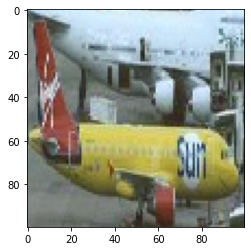

[7.8999043e-01 2.5088074e-12 1.2481676e-05 2.0999624e-01 7.4957370e-07
 8.6720411e-17 8.6208573e-08 2.5572914e-14]

I am 79.00% certain that this is a airplane


In [ ]:
# After having trained a model, how to we call it and use it with individual inputs?
# here's one way to do it:


# load an image from the test set, transorm it into the right input shape for the model, and get the model's prediction on it
# ALTERNATIVELY: use an image of your choice (your car, your cat, your airplane, the fruit you ate for lunch).


classification_data_path='/content/natural_images_classification'
obj=random.choice(os.listdir(os.path.join(classification_data_path,'test')))
file=random.choice(os.listdir(os.path.join(classification_data_path,'test',obj)))
print(file)

img = image.load_img(os.path.join(classification_data_path,'test',obj,file), target_size=(100, 100))
img_exp = image.img_to_array(img)
img_exp = np.expand_dims(img_exp, axis=0)
img_exp /= 255.

## check the image
plt.imshow(img_exp[0])
plt.show()

## ask model to predict
## notice that the prediction comes in the form of a vector with length = number_of_classes and values which correspond to probablities for each class
prediction = model.predict(img_exp)
print(prediction[0])

# just for fun: translate above prediction (vector with class probablilities) to a more human-friendly answer
class_labels=train.class_indices
class_labels=dict((value,key) for key,value in class_labels.items())
predicted_class=class_labels[np.argmax(prediction[0],axis=-1)]
accuracy=np.max(prediction)
print()
print('I am %.2f%% certain that this is a %s'  % (accuracy*100.0,predicted_class))


### Tracking and logging

Keeping track of the networks you run, with their parameters, outputs, code, saved models, architectures, etc, etc... is extremely useful but also tedious to do in a consistent manner.
Luckily there are various tools available for that many of which are web-based for easy access and independent of the machine/environment on which you run/train your models.

Usually it requires creating an account so that you can send and access your outputs.
Here's just three such tools (they are not all offering the same features or functionalities). I encourage you to pick one, and spend some time learning how to implement them into your DL code (usually takes a couple of extra lines). All three work both with TF and PyTorch.

-Neptune (https://neptune.ai/)

-Weights and biases (https://wandb.ai/)

-Tensorboard (this is native to tensorflow)(https://www.tensorflow.org/tensorboard/get_started)

### Looking at feature maps (what does a convnet learn)

The following piece of code is taken from here: https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

François Chollet is the author of this and many-many other very helpful online tutorials.  

Also his book 'Deep Learning with Python' is an excellent start to practical DL.

This blog from the keras site is also a fun read and gives an interesting outlook at the learning process of convnets:

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html


In [ ]:
# We are assuming your model is loaded and is called 'model'. If not the case, load your model first

# Extracts the outputs of the top 6 layers (in this case all the layers above the Flatten layer):
layer_outputs = [layer.output for layer in model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


(100, 100, 3)
(1, 100, 100, 3)


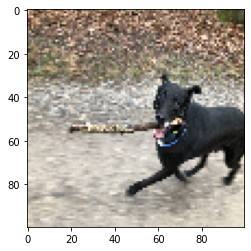

In [ ]:


img_path='/content/natural_images/dog/dog_0007.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
## Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
## check the image
plt.imshow(img_tensor[0])
#plt.imshow(np.squeeze(img_tensor),cmap='gray') # for 1-channel grayscale images

plt.show()

In [ ]:
# This will return a list of 6 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)


In [ ]:
# in our example where the model was like this: Conv2D-MaxPool-Conv2D-MaxPool-Conv2D-MaxPool, activations[0] correspond to the output of the first Conv layer,
# activations[1] correspond to the output (feature maps) from the first MaxPool layer, etc....

print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)

(1, 98, 98, 32)
(1, 49, 49, 32)
(1, 47, 47, 64)
(1, 23, 23, 64)
(1, 21, 21, 128)
(1, 10, 10, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


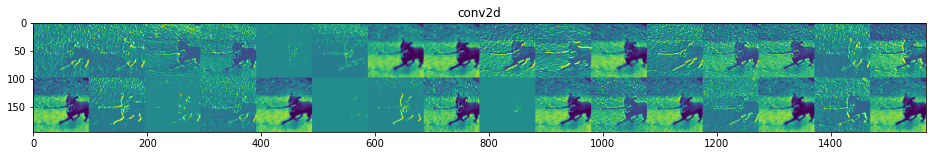

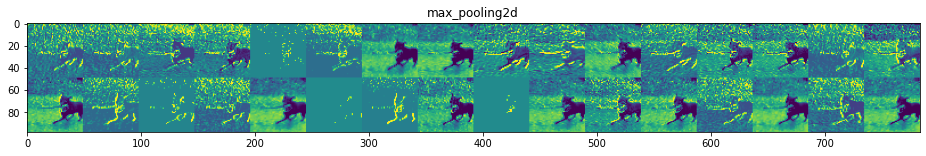

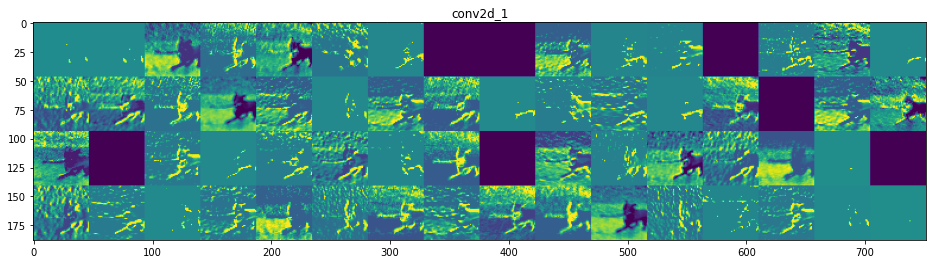

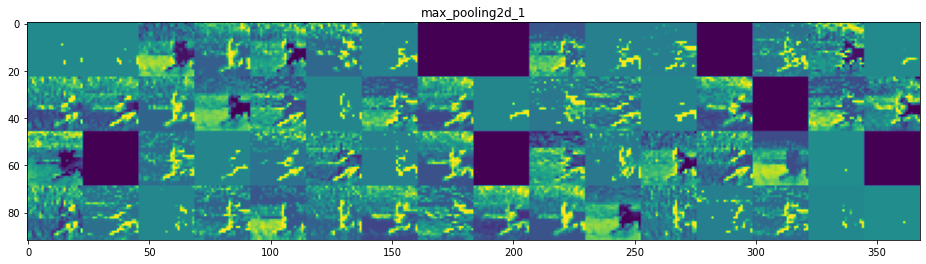

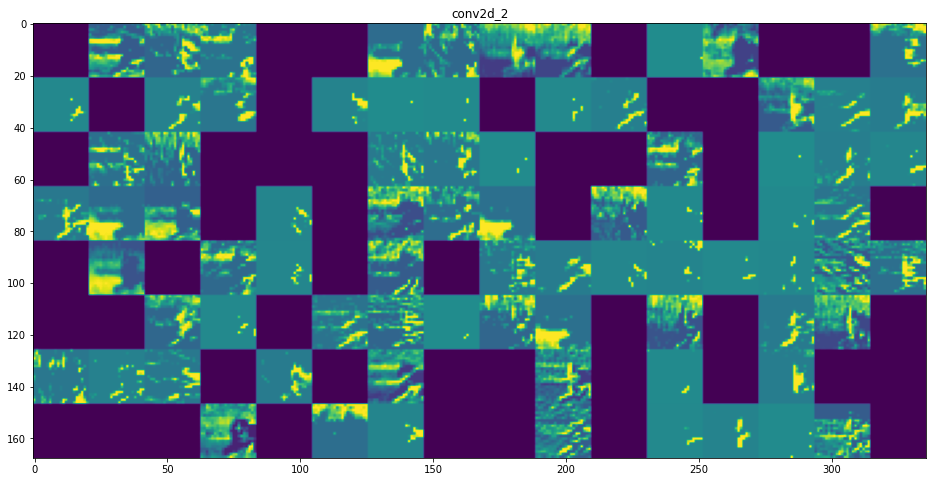

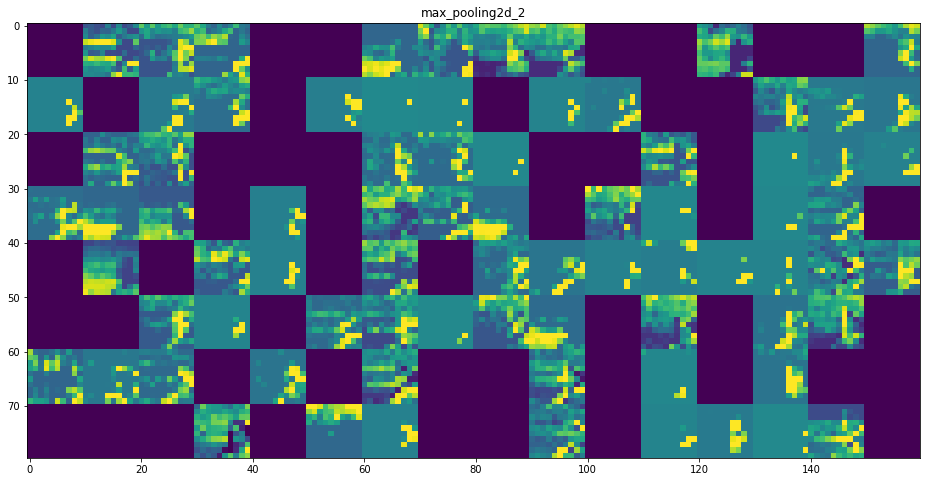

In [ ]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()